# Trabajo Práctico N° 2 - Grupo 6

### Conformado por
Agustina Hilal, Jhonatan Esplana, Juan Pablo Soto Castaño, Federico Santaella, Franco Ayala Vera, Nico Mlicotta, María Catalina García, Diego Arenas, Melissa Montes

# Generación del Modelo

In [1]:
#Importamos el df utilizado en el TP1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("properatti_csv_limpio.csv")

In [2]:
df.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,tiene_balcon_a,rooms_2,price_aprox_usd_2,price_2,price_aprox_local_currency_2,surface_total_in_m2_2,surface_covered_in_m2_2,price_usd_per_m2_2,price_per_m2_2,currency_2
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,0,2.0,62000.0,62000.0,1093959.0,55.000000,40.000000,1127.272727,1127.272727,USD
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,1,3.0,150000.0,150000.0,2646675.0,120.287343,79.378924,1247.013994,1247.013994,USD
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,0,2.0,72000.0,72000.0,1270404.0,55.000000,55.000000,1309.090909,1309.090909,USD
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,0,3.0,95000.0,95000.0,1676227.5,92.869150,82.849670,1022.944649,1022.944649,USD
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,0,2.0,64000.0,64000.0,1129248.0,35.000000,35.000000,1828.571429,1828.571429,USD


### Definición de columnas a utilizar

Elegimos las columnas que son significativas para la predicción:
- floors
- expenses
- rooms 
- surface_total_in_m2
- surface_covered_in_m2
- property_type
- place_name_2
- state_name

### Columna Label

Esta columna será nuestra variable target a predecir utilizando los modelos de predicción. En este caso estaremos usando la columna = 'price_usd_per_m2_2' de nuestro df.

### Ciudades a Predecir

Analizaremos que datos utilizaremos dentro de la base de datos para reducir la variabilidad del modelo.Comenzaremos intentando identificar que ciudad utilizaremos para armar el modelo, por lo cual se cuenta la cantidad de ocurrencias de cada valor único en la columna 'state_name'

In [3]:
state_counts = df['state_name_2'].value_counts()
state_counts

Buenos Aires           93191
Córdoba                12046
Santa Fe               10167
Río Negro                806
Neuquén                  732
Mendoza                  680
Tucumán                  674
Corrientes               582
Misiones                 459
Entre Ríos               368
Salta                    277
Chubut                   258
San Luis                 251
La Pampa                 156
Formosa                   65
Chaco                     57
San Juan                  40
Tierra Del Fuego          31
Catamarca                 27
Jujuy                     26
Santa Cruz                20
La Rioja                   4
Santiago Del Estero        4
Name: state_name_2, dtype: int64

Debido a que vamos a predecir valores de una colección específica de datos, solo nos interesa entrenar el modelo con aquellas que garanticen al menos 2000 registros. 

In [4]:
# Cuento la cantidad de propiedades por provincia.
df_propiedades_por_state = df[['state_name_2','property_type']].groupby(by='state_name_2').count()
states_for_model = df_propiedades_por_state.loc[df_propiedades_por_state['property_type'] > 2000]
states_for_model

,property_type
state_name_2,
Buenos Aires,93191
Córdoba,12046
Santa Fe,10167


Analizo las ciudades de las provicias de Bs As, Córdoba y Santa Fé para elegir que ciudad tomar para realizar el análisis

In [5]:
df_propiedades_por_place = df[df['state_name_2'].isin(['Buenos Aires', 'Córdoba', 'Santa Fé'])]
df_propiedades_por_place.head()

,Unnamed: 0,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,lat,...,tiene_balcon_a,rooms_2,price_aprox_usd_2,price_2,price_aprox_local_currency_2,surface_total_in_m2_2,surface_covered_in_m2_2,price_usd_per_m2_2,price_per_m2_2,currency_2
0,0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,...,0,2.0,62000.0,62000.0,1093959.0,55.000000,40.000000,1127.272727,1127.272727,USD
1,1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,...,1,3.0,150000.0,150000.0,2646675.0,120.287343,79.378924,1247.013994,1247.013994,USD
2,2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,...,0,2.0,72000.0,72000.0,1270404.0,55.000000,55.000000,1309.090909,1309.090909,USD
3,3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,...,0,3.0,95000.0,95000.0,1676227.5,92.869150,82.849670,1022.944649,1022.944649,USD
4,4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,...,0,2.0,64000.0,64000.0,1129248.0,35.000000,35.000000,1828.571429,1828.571429,USD


Este código cuenta la cantidad de propiedades por ciudad y tipo de propiedad. Luego filtra aquellos lugares (ciudades) que tienen más de 2000 propiedades y muestra el resultado.

In [6]:
# Cuento la cantidad de propiedades por ciudad.
df_propiedades_por_place = df[['place_name_2', 'property_type']].groupby(by=['place_name_2', 'property_type']).size().reset_index(name='count')
places_for_model = df_propiedades_por_place[df_propiedades_por_place['count'] > 2000]
places_for_model

,place_name_2,property_type,count
236,Belgrano,apartment,2761
321,Caballito,apartment,2078
549,Córdoba,apartment,5975
550,Córdoba,house,2544
1118,Mar del Plata,apartment,4456
1247,Nordelta,apartment,2081
1290,Palermo,apartment,2598
1531,Rosario,apartment,7434


Decidimos utilizar como df base para realizar el modelo de predicción de precios a: 
###### Los property_type = 'apartment' del barrio de Palermo 
Se decidió esto para reducir la variabiliad del modelo al tomar datos con mayor similitud entre sí.
Reordenamos nuevamente el dataset, renombramos columnas y mantenemos solo las columnas que utilizaremos en el modelado

In [7]:
#Filtramos el df para tomar unicamente los valores de los apartamentos de Rosario
df = df[(df['place_name_2'] == 'Palermo') & (df['property_type'] == 'apartment')]

### Creamos columnas que nos pueden servir para el modelado

In [8]:
#Creamos columna tiene_SUM
df["tiene_SUM"] = df["description"].str.contains("quincho|SUM|salón de usos múltiples|salon de usos multiples", case=False)
df["tiene_SUM"].sum()

800

In [9]:
#Creamos columna tiene_cochera
df["tiene_cochera"] = df["description"].str.contains("cochera|garage|estacionamiento", case=False)
df["tiene_cochera"].sum()

1114

In [10]:
#Creamos columna tiene_gimnasio
df["tiene_gimnasio"] = df["description"].str.contains("gym|gimnasio|gim", case=False)
df["tiene_gimnasio"].sum()

520

In [11]:
    #Creamos columna tiene_balcón_a en base a analizar el texto de la columna description
    df["tiene_balcon_a"] = df["description"].str.contains("balcón|balcon", case=False)
    df["tiene_balcon_a"].sum()

    #Calculamos si tiene balcón en base a la superficie cubierta vs total
    def tiene_balcon_calcular(fila):
         return fila["surface_total_in_m2"] - fila["surface_covered_in_m2"]>0

    df["tiene_balcon_b"] = df.apply(tiene_balcon_calcular, axis = 1)
    df["tiene_balcon_b"].sum()

    #Creamos la columna tiene_balcón combinando las dos anteriores
    df["tiene_balcon"] = df["tiene_balcon_a"] | df["tiene_balcon_b"]
    df["tiene_balcon"].sum()

2085

In [12]:
#Creamos columna tiene_pileta
df["tiene_pileta"] = df["description"].str.contains("pileta|piscina", case=False)
df["tiene_pileta"].sum()

897

### Reordenamos
Reordenamos nuevamente el dataset, renombramos columnas y mantenemos solo las columnas que utilizaremos en el modelado

In [13]:
#Selecciono las columnas a utilizar
#Elimino las columnas de place_name_2 y property_type ya que son columnas con valores únicos.
#Tambien elimino floor y expenses por la cantidad de nulos

df = df[['surface_total_in_m2_2', 'surface_covered_in_m2_2', 'rooms_2', 'price_usd_per_m2_2', "tiene_balcon", "tiene_cochera", "tiene_gimnasio", "tiene_pileta", "tiene_SUM"]].copy()

df.rename(columns={'surface_total_in_m2_2': 'surface_total_in_m2', 'surface_covered_in_m2_2': 'surface_covered_in_m2', 'rooms_2': 'rooms', 'price_usd_per_m2_2': 'price_usd_per_m2'}, inplace=True)

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 19 to 120847
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_total_in_m2    2592 non-null   float64
 1   surface_covered_in_m2  2591 non-null   float64
 2   rooms                  2592 non-null   float64
 3   price_usd_per_m2       2568 non-null   float64
 4   tiene_balcon           2598 non-null   bool   
 5   tiene_cochera          2598 non-null   bool   
 6   tiene_gimnasio         2598 non-null   bool   
 7   tiene_pileta           2598 non-null   bool   
 8   tiene_SUM              2598 non-null   bool   
dtypes: bool(5), float64(4)
memory usage: 114.2 KB


## Columnas Dummies y Eliminación de Outliers
Este código utiliza Label Encoding para convertir las categorías en la columna "place_name_2" en valores numéricos, asignando un número único a cada categoría. Luego, agrega una nueva columna llamada "place_name_2_encod" al DataFrame con los valores codificados.

In [14]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador
label_encoder = LabelEncoder()

# Aplicar Label Encoding a la columna "place_name_2"
df['tiene_pileta_d'] = label_encoder.fit_transform(df['tiene_pileta'])
df['tiene_balcon_d'] = label_encoder.fit_transform(df['tiene_balcon'])
df['tiene_SUM_d'] = label_encoder.fit_transform(df['tiene_SUM'])
df['tiene_cochera_d'] = label_encoder.fit_transform(df['tiene_cochera'])
df['tiene_gimnasio_d'] = label_encoder.fit_transform(df['tiene_gimnasio'])

#Eliminamos las demas
df = df.drop(['tiene_pileta','tiene_balcon','tiene_SUM','tiene_cochera','tiene_gimnasio'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2598 entries, 19 to 120847
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_total_in_m2    2592 non-null   float64
 1   surface_covered_in_m2  2591 non-null   float64
 2   rooms                  2592 non-null   float64
 3   price_usd_per_m2       2568 non-null   float64
 4   tiene_pileta_d         2598 non-null   int64  
 5   tiene_balcon_d         2598 non-null   int64  
 6   tiene_SUM_d            2598 non-null   int64  
 7   tiene_cochera_d        2598 non-null   int64  
 8   tiene_gimnasio_d       2598 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 203.0 KB


### Preparación de Labels de Train y Test

Utilizando 3 modelos de Regresión Lineal y Regularización y lo entrenamos con nuestros datos

#### Terminamos de Armar el DF utilizando solo filas con precios <> 0

In [15]:
# Eliminar filas con valores nulos en la columna 'price_usd_per_m2'
df = df.dropna(subset=['price_usd_per_m2', 'rooms', 'surface_covered_in_m2'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2567 entries, 19 to 120847
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surface_total_in_m2    2567 non-null   float64
 1   surface_covered_in_m2  2567 non-null   float64
 2   rooms                  2567 non-null   float64
 3   price_usd_per_m2       2567 non-null   float64
 4   tiene_pileta_d         2567 non-null   int64  
 5   tiene_balcon_d         2567 non-null   int64  
 6   tiene_SUM_d            2567 non-null   int64  
 7   tiene_cochera_d        2567 non-null   int64  
 8   tiene_gimnasio_d       2567 non-null   int64  
dtypes: float64(4), int64(5)
memory usage: 200.5 KB


## Dataset

Filtramos datos para trabajar con departamentos con una misma relación. La variable target presenta una gran variabilidad con las variables predictivas, lo que genera una performace muy baja para todos los modelos planteados previamente.

Se decidio trabajar con departamentos que presenta una relación similar, dada la gran variabilidad que hay en los departamentos.Los modelos planteados se prodran usar para departamentos que presenten un comportamiento estandar. -->

#### Presencia de outliers

A priori se puede determinar que estos outliers no aportan robustez a los modelos, aumentan la cantidad de error en los mismos.

<AxesSubplot:xlabel='rooms', ylabel='price_usd_per_m2'>

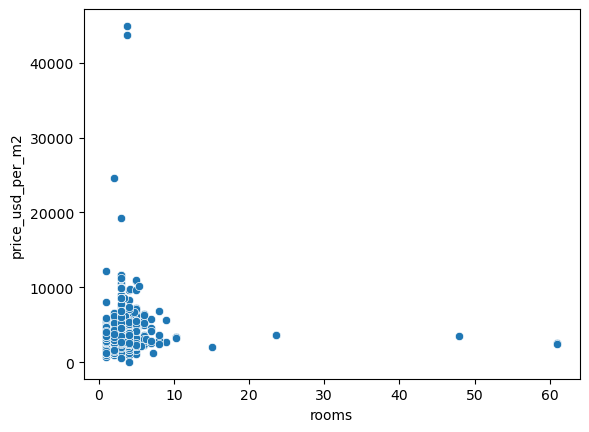

In [17]:
df_plot = df
sns.scatterplot(x='rooms',y="price_usd_per_m2",data=df_plot)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_usd_per_m2'>

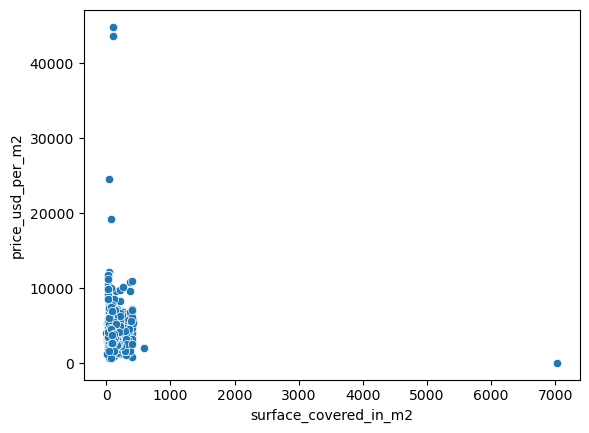

In [18]:
sns.scatterplot(x='surface_covered_in_m2',y="price_usd_per_m2",data=df_plot)

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price_usd_per_m2'>

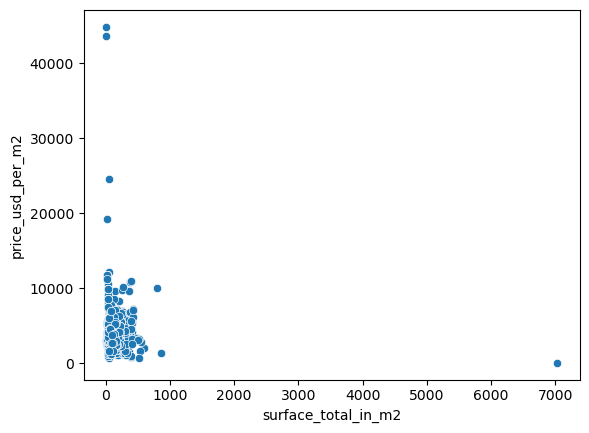

In [19]:
sns.scatterplot(x='surface_total_in_m2',y="price_usd_per_m2",data=df_plot)

In [20]:
#Eliminamos outliers y establecemos un comportamiento estandar en los departamentos
mask = (df['rooms'] < 10) & (df['rooms'] > 1) & (df['surface_total_in_m2'] > 50) & (df['surface_total_in_m2'] < 500)
df = df[mask]

In [21]:
df.shape

(1666, 9)

### Sin outliers
Las predictoras no presentan un patron o tendencia, con respecto a la variable target

<AxesSubplot:xlabel='rooms', ylabel='price_usd_per_m2'>

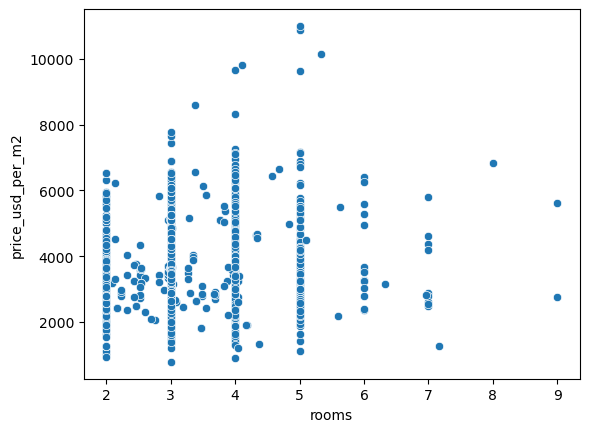

In [22]:
sns.scatterplot(x='rooms',y="price_usd_per_m2",data=df)

<AxesSubplot:xlabel='surface_covered_in_m2', ylabel='price_usd_per_m2'>

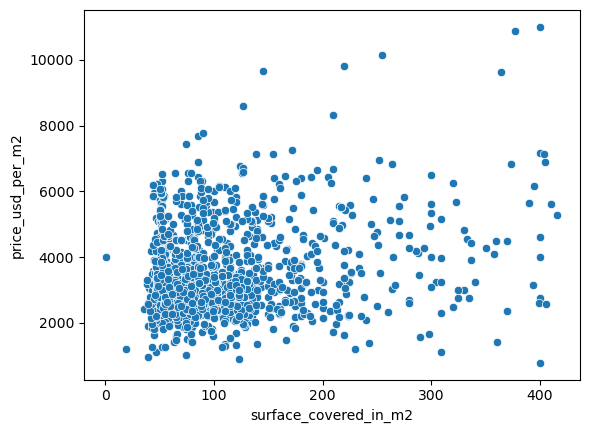

In [23]:
sns.scatterplot(x='surface_covered_in_m2',y="price_usd_per_m2",data=df)

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price_usd_per_m2'>

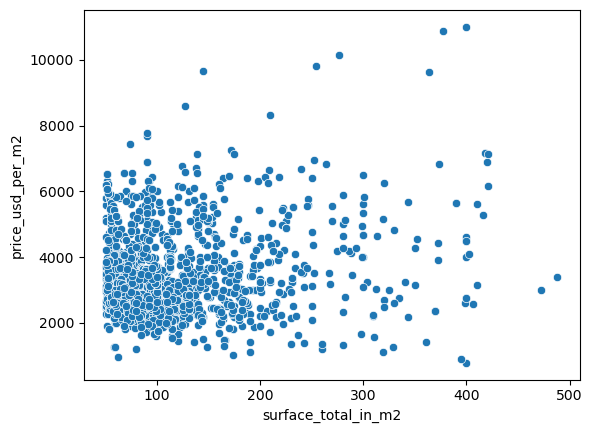

In [24]:
sns.scatterplot(x='surface_total_in_m2',y="price_usd_per_m2",data=df)

### Armar la matriz de Features y Labels

In [25]:
# Obtengo los labels precio aprox per m2 en USD
Y = df['price_usd_per_m2']

# Obtengo los valores de los features
X = df.drop(['price_usd_per_m2'], axis = 1)

In [26]:
# Corroboro el shape y tipo de cada una
print("Shape X: ",X.shape)
print("Type X: ",type(X))

print("Shape Y: ",Y.shape)
print("Type Y: ",type(Y))

Shape X:  (1666, 8)
Type X:  <class 'pandas.core.frame.DataFrame'>
Shape Y:  (1666,)
Type Y:  <class 'pandas.core.series.Series'>


### Normalizamos los datos de la Matriz de Features

Es necesario estandarizar las variables para eliminar sus distintas unidades de medida y evitar distorsiones debidas a diversas escalas. StandardScaler() normaliza/estandariza cada columna de la matriz X de features, en forma individual, con una media μ = 0 y un std σ = 1.

In [27]:
from sklearn.preprocessing import StandardScaler

#Creamos el objeto StandardScaler()
scaler = StandardScaler()

#Aplicamos el método a las variables de la matriz de features
X_scaled = scaler.fit_transform(X)

### Separamos el Dataset en Sets de Train y Test

In [28]:
# Utilizamos el método train_test_split de Scikit Learn para separar los datos
from sklearn.model_selection import train_test_split

random_state=1
train_size=0.70

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=random_state, train_size=train_size)
    
#X_train, X_test, Y_train, Y_test

In [29]:
print('Se entrenarán a los modelos con ',len(X_train),'registros')
print('Se entrenara al',round((len(X_train)/len(X)),2)*100,'% del total de los datos de la matriz features')

Se entrenarán a los modelos con  1166 registros
Se entrenara al 70.0 % del total de los datos de la matriz features


Armamos un df para almacenar los resultados encontrados en cada modelo y evaluar su rendimiento

In [30]:
# Dataframe donde muestro los resultados
df_resultados = pd.DataFrame(columns=['Model','MSE','MAE','RMSE','R2','Alpha'])

### Comenzamos con el Armado de los Modelos

#### Regularización Ridge

In [31]:
# Comienzo seteando los folds y aplha
folds_range = range(2,11) #probamos de 2 a 10 folds
alphas = np.linspace(0.1,100,10) #iteramos 1000 veces igualmente espaciados entre 0.1 y 100

#Defino listas de almacenamiento para los resultados de la prueba
mejor_rdo_ridge = -np.inf
mejor_folds = []

Instanciamos un modelo utilizando un rango de alfas de tal forma que se generen 100 valores igualmente espaciados entre 0.1 y 100. Se realiza un cross validation para identificar la mejor cantidad de folds en un rango de 2 a 10. Se utiliza a r2 como métrica de evaluación del modelo

In [32]:
#itero para saber el mejor fold y alpha a utilizar

import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score

for folds in folds_range:
    modelo_ridge = RidgeCV(alphas=alphas, cv=folds, scoring='r2')
    scores_ridge = cross_val_score(modelo_ridge, X_train, Y_train, cv= folds)
    
    #Promediando los valores iterados
    promedio_scores = scores_ridge.mean()
    
    #Verifico cual es el mayor valor
    if promedio_scores > mejor_rdo_ridge:
        mejor_rdo_ridge = promedio_scores
        mejor_folds = folds

print("Mejor numero de folds para Ridge: ", mejor_folds)
print("Mejor score promedio para Ridge: ", mejor_rdo_ridge)

Mejor numero de folds para Ridge:  2
Mejor score promedio para Ridge:  0.21916577129774922


Una vez definida la mejor cantidad de folds procedemos a entrenar el modelo y evaluarlo

In [33]:
#Elijo el modelo
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,mean_absolute_error

# Instancio el modelo
modelo_ridge = linear_model.RidgeCV(alphas=alphas, cv=mejor_folds, scoring='r2')

# Ajusto el modelo
modelo_ridge_ajustado = modelo_ridge.fit(X_train, Y_train)

# Predigo los valores 
ridge_target = modelo_ridge_ajustado.predict(X_test)

# Evaluo la performance del Modelo
mae = mean_absolute_error(Y_test, ridge_target). round(2)
mse = mean_squared_error(Y_test, ridge_target). round(2)
rmse = np.sqrt(mean_squared_error(Y_test, ridge_target)).round(2)
r2 = r2_score(Y_test, ridge_target). round(2)

# Agrego los resultados al dataframe de resultados
row = {'Model':'Regularización Ridge', 'MAE': mae.mean(),'MSE': mse.mean(),'RMSE': rmse.mean(),
       'R2': r2.mean(),'Alpha': modelo_ridge_ajustado.alpha_, 'Cant. Cols.': pd.DataFrame(X_train).shape[1]}

# Crear un DataFrame temporal para la nueva fila
df_nueva_fila = pd.DataFrame(row, index=[0])

# Concatenar el DataFrame temporal con df_resultados
df_resultados = pd.concat([df_resultados, df_nueva_fila], ignore_index=True)

# Muestro los resultados
df_resultados

,Model,MSE,MAE,RMSE,R2,Alpha,Cant. Cols.
0,Regularización Ridge,1099979.03,809.41,1048.8,0.29,11.2,8.0


In [34]:
best_alpha = modelo_ridge_ajustado.alpha_
model_ridge = linear_model.Ridge(alpha = best_alpha, fit_intercept = True)
model_fit_ridge = model_ridge.fit(X_train, Y_train)

#Imprimimos los coeficientes, intercepto y r2
print("Coeficientes")
print(np.round(model_fit_ridge.coef_, 2), '\n')
print("Intercepto")
print(np.round(model_fit_ridge.intercept_, 2), '\n')
print("R2")
print(np.round(model_fit_ridge.score(X_train, Y_train), 2))

Coeficientes
[ -7.54   9.83  56.12 371.97  96.74 138.36 356.06 629.54] 

Intercepto
2569.06 

R2
0.23


In [35]:
#Evaluamos el modelo con datos no vistos
model_fit_ridge.score(X_test, Y_test)

0.291431775020234

### Realizamos Gráficos
##### Gráfico de dispersión de valores reales vs. predichos:
Se comparan los valores reales con las predicciones del modelo. 

In [36]:
X_test.shape

(500, 8)

In [37]:
ridge_target.shape

(500,)

In [38]:
Y_test.shape

(500,)

In [39]:
len(Y_test)

500

In [40]:
len(X_test)

500

In [41]:
len(ridge_target)

500

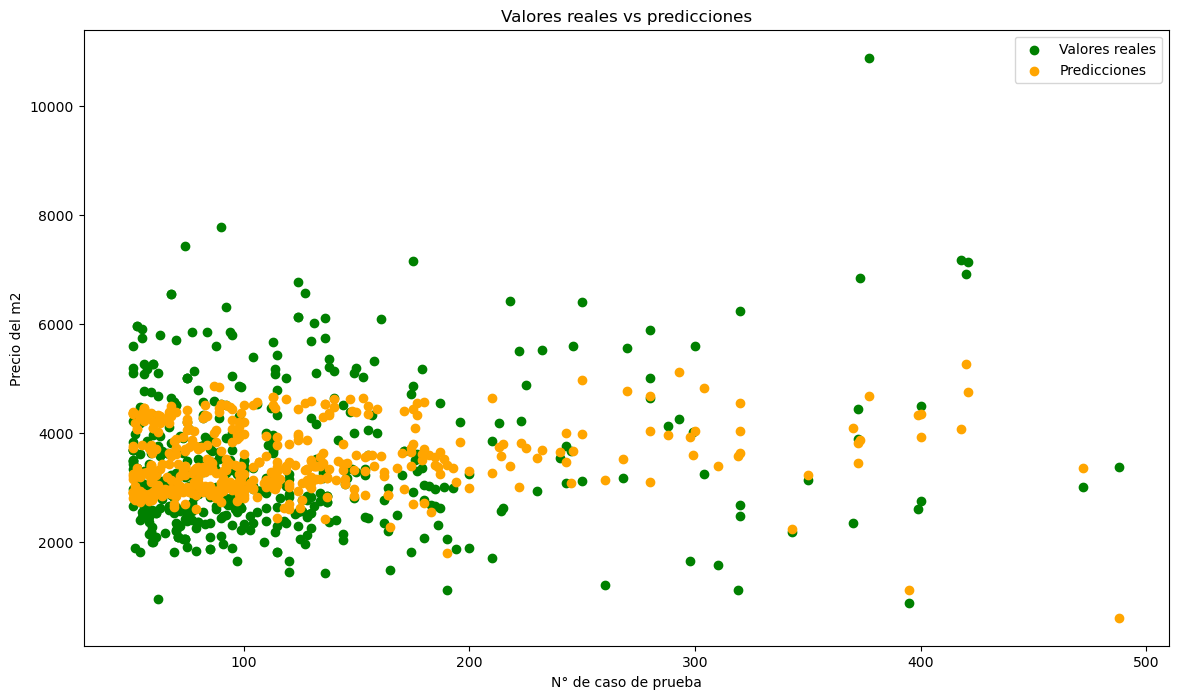

In [42]:
X_test_np = np.array(X_test)
casos_de_prueba = X_test_np[:, 0]

plt.figure(figsize=(14, 8))
plt.scatter(casos_de_prueba, Y_test, color='green', label='Valores reales')
plt.scatter(casos_de_prueba, ridge_target, color='orange', label='Predicciones')
plt.xlabel('N° de caso de prueba')
plt.ylabel('Precio del m2')
plt.title('Valores reales vs predicciones')
plt.legend()
plt.show()

#### Gráfico de residuos vs. valores predichos
Muestra los residuos (diferencias entre los valores reales y predichos) en el eje vertical frente a los valores predichos en el eje horizontal. 

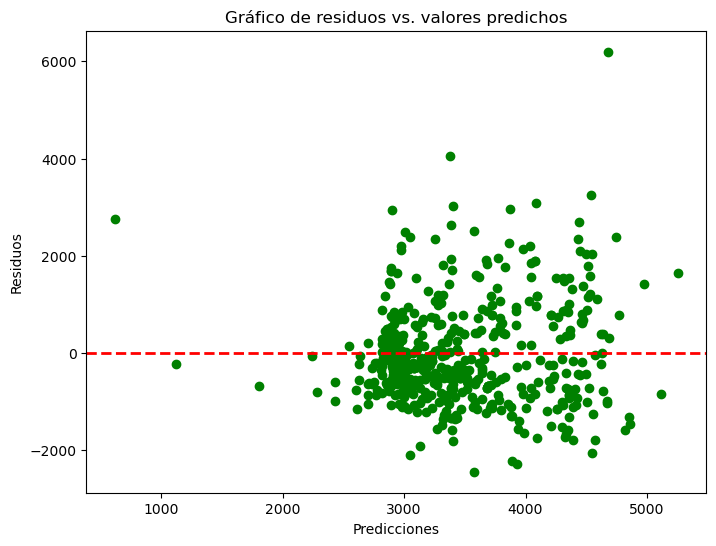

In [43]:
residuos = Y_test - ridge_target

plt.figure(figsize=(8, 6))
plt.scatter(ridge_target, residuos, color='green')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicciones')
plt.ylabel('Residuos')
plt.title('Gráfico de residuos vs. valores predichos')
plt.show()

#### Histograma de residuos
Muestra la distribución de los residuos

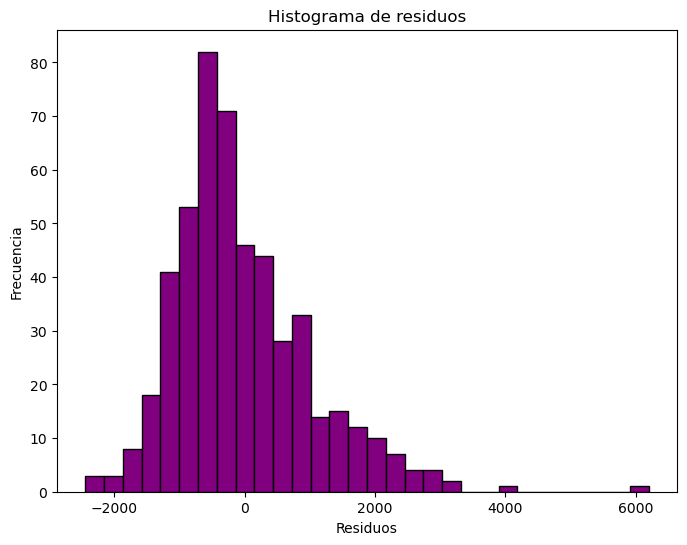

In [44]:
plt.figure(figsize=(8, 6))
plt.hist(residuos, bins=30, color='purple', edgecolor='black')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.title('Histograma de residuos')
plt.show()

### Regularización Lasso

In [45]:
#Importamos las librerias que vamos a utilizar
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import cross_val_score

Reutilizamos los parámetros definidos de folds y alpha en el modelo de Ridge. Se realiza un cross validation con Lasso para identificar la mejor cantidad de folds en un rango de 2 a 10. Se utiliza a r2 como métrica de evaluación del modelo

In [46]:
# Defino dos valores vacios numericos para recorrer en un for para Lasso.
best_score_lasso = -np.inf
best_folds_lasso = 0

for folds in folds_range : 

    model_lasso_cv = LassoCV(alphas=alphas , cv= folds)
    
    #Itero sobre distintos valores de fold.
    scores_lasso = cross_val_score(model_lasso_cv, X_train, Y_train, cv=folds)
    
    #Hago un promedio de los valores iterados.
    mean_score_lasso = scores_lasso.mean()
    
    #Si el promedio es mayor que el valor mas alto alcanzado.
    if mean_score_lasso > best_score_lasso:
        
        #Entonces el promedio es el valor mas alcanzado.
        best_score_lasso = mean_score_lasso
        
        #Para este numero de folds
        best_folds_lasso = folds

print("Mejor numero de folds para Lasso: ", best_folds_lasso)
print("Mejor score promedio par Lasso: ", best_score_lasso)

Mejor numero de folds para Lasso:  2
Mejor score promedio par Lasso:  0.21842771326159877


Una vez definida la mejor cantidad de folds procedemos a entrenar el modelo y evaluarlo

In [47]:
#Elijo el modelo
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Instancio el modelo
modelo_lasso = linear_model.LassoCV(alphas=alphas, cv=mejor_folds)

# Ajusto el modelo
modelo_lasso_ajustado = modelo_lasso.fit(X_train, Y_train)

# Predigo los valores 
lasso_target = modelo_lasso_ajustado.predict(X_test)

# Evaluo la performance del Modelo
mae = mean_absolute_error(Y_test, lasso_target). round(2)
mse = mean_squared_error(Y_test, lasso_target). round(2)
rmse = np.sqrt(mean_squared_error(Y_test, lasso_target)).round(2)
r2 = r2_score(Y_test, lasso_target). round(2)

# Agrego los resultados al dataframe de resultados
row = {'Model':'Regularización Lasso', 'MAE': mae.mean(),'MSE': mse.mean(),'RMSE': rmse.mean(),
       'R2': r2.mean(),'Alpha': modelo_lasso_ajustado.alpha_, 'Cant. Cols.': pd.DataFrame(X_train).shape[1]}

# Crear un DataFrame temporal para la nueva fila
df_nueva_fila = pd.DataFrame(row, index=[0])

# Concatenar el DataFrame temporal con df_resultados
df_resultados = pd.concat([df_resultados, df_nueva_fila], ignore_index=True)

# Muestro los resultados
df_resultados

,Model,MSE,MAE,RMSE,R2,Alpha,Cant. Cols.
0,Regularización Ridge,1099979.03,809.41,1048.80,0.29,11.2,8.0
1,Regularización Lasso,1097218.54,807.96,1047.48,0.29,0.1,8.0


In [48]:
best_alpha = modelo_lasso_ajustado.alpha_
model_lasso = linear_model.Lasso(alpha = best_alpha, fit_intercept = True)
model_fit_lasso = model_lasso.fit(X_train, Y_train)

#Imprimimos los coeficientes, Intercepto y r2
print("Coeficientes")
print(np.round(model_fit_lasso.coef_, 2), '\n')
print("Intercepto")
print(model_fit_lasso.intercept_, '\n')
print("R2")
print(model_fit_lasso.score(X_train, Y_train))

Coeficientes
[ -7.55   9.8   58.48 370.51 101.38 127.7  363.62 669.9 ] 

Intercepto
2553.261843811448 

R2
0.23514482542228043


In [49]:
#Evaluamos el modelo con datos no vistos
model_fit_lasso.score(X_test, Y_test)

0.29320999024422667

### Realizamos Gráficos
Relacion entre cada feature y el precio por metro cuadrado

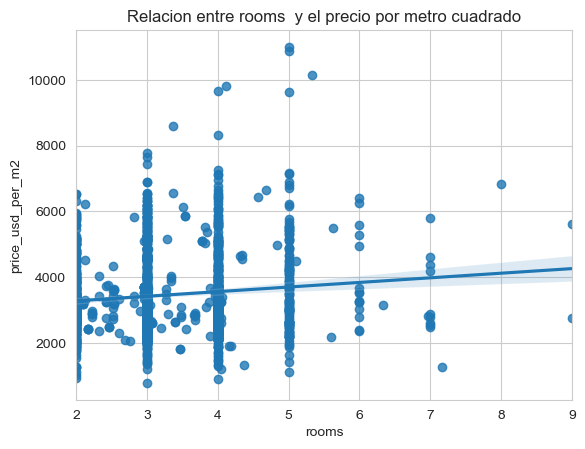

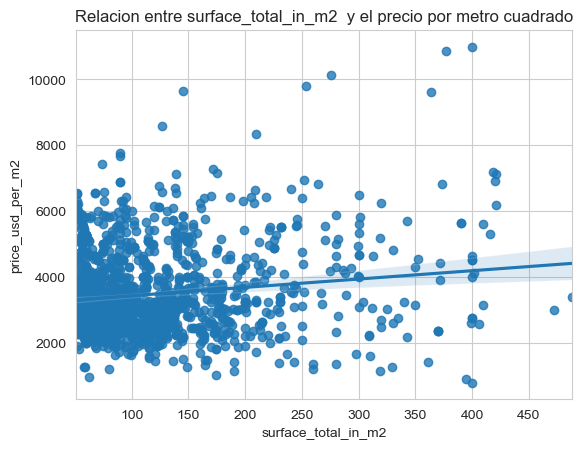

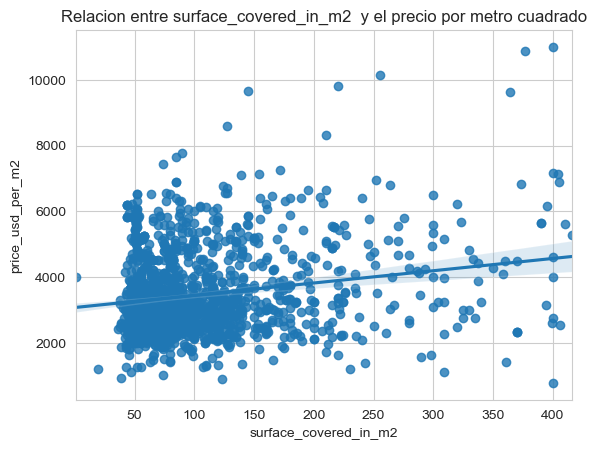

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

#Definir los features y el target
feature_cols = ["rooms","surface_total_in_m2","surface_covered_in_m2"]
target_col = "price_usd_per_m2"
#crear los graficos
for feature in feature_cols:
    #crear el grafico
    sns.set_style("whitegrid")
    sns.regplot(x=df[feature], y=df[target_col])

    #agregar titulo y etiquetas de los ejes
    plt.title(f"Relacion entre {feature}  y el precio por metro cuadrado")
    plt.xlabel(feature)
    plt.ylabel(target_col)

    #Mostrar el grafico
    plt.show()

### Modelo Regresión Lineal Múltiple

In [51]:
#Importamos las librerias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [52]:
#Instacnciamos las clase del modelo
modelo_lineal = LinearRegression()

#Ajustamos el modelo a los datos
modelo_fit_lineal = modelo_lineal.fit(X_train, Y_train)

#Generamos las predicciones
multiple_target = modelo_fit_lineal.predict(X_test)

# Evaluo la performance del Modelo
mae = mean_absolute_error(Y_test, multiple_target). round(2)
mse = mean_squared_error(Y_test, multiple_target). round(2)
rmse = np.sqrt(mean_squared_error(Y_test, multiple_target)).round(2)
r2 = r2_score(Y_test, multiple_target). round(2)

print("Coefcientes")
print(np.round(modelo_fit_lineal.coef_, 2), '\n')
print("Intercepto")
print(modelo_fit_lineal.intercept_.round(2))

Coefcientes
[ -7.55   9.8   58.73 370.52 102.08 127.98 363.85 670.31] 

Intercepto
2551.89


In [53]:
modelo_fit_lineal.score(X_test, Y_test)

0.29319731199917454

In [54]:
# Agrego los resultados al dataframe de resultados
row = {'Model':'Regresion multiple', 'MAE': mae.mean(),'MSE': mse.mean(),'RMSE': rmse.mean(),
       'R2': r2.mean(),'Alpha': np.NaN, 'Cant. Cols.': pd.DataFrame(X_train).shape[1]}

# Crear un DataFrame temporal para la nueva fila
df_nueva_fila = pd.DataFrame(row, index=[0])

# Concatenar el DataFrame temporal con df_resultados
df_resultados = pd.concat([df_resultados, df_nueva_fila], ignore_index=True)

# Muestro los resultados
df_resultados

,Model,MSE,MAE,RMSE,R2,Alpha,Cant. Cols.
0,Regularización Ridge,1099979.03,809.41,1048.80,0.29,11.2,8.0
1,Regularización Lasso,1097218.54,807.96,1047.48,0.29,0.1,8.0
2,Regresion multiple,1097238.22,807.96,1047.49,0.29,NaN,8.0


### Resultados finales y conclusiones

In [55]:
#Creamos el dataframe para los coeficientes de todas las variables
coef_multiple = np.hstack(( np.array(modelo_fit_lineal.intercept_), modelo_fit_lineal.coef_)).round(2)
coef_lasso = np.hstack(( np.array(model_fit_lasso.intercept_), model_fit_lasso.coef_)).round(2)
coef_ridge = np.hstack(( np.array(model_fit_ridge.intercept_), model_fit_ridge.coef_)).round(2)

dict_coef={"Ridge":coef_ridge,
         "Lasso":coef_lasso,
         "Lienal Multiple":coef_multiple}

df_coef = pd.DataFrame(dict_coef).T

name_column = np.hstack((np.array("B0"),X.columns))

df_coef.columns = name_column

In [56]:
#Coeficientes de todas las variables
df_coef

,B0,surface_total_in_m2,surface_covered_in_m2,rooms,tiene_pileta_d,tiene_balcon_d,tiene_SUM_d,tiene_cochera_d,tiene_gimnasio_d
Ridge,2569.06,-7.54,9.83,56.12,371.97,96.74,138.36,356.06,629.54
Lasso,2553.26,-7.55,9.80,58.48,370.51,101.38,127.70,363.62,669.90
Lienal Multiple,2551.89,-7.55,9.80,58.73,370.52,102.08,127.98,363.85,670.31


In [57]:
#Resulado: Metricas e hiperparámetros de los modelos
df_resultados

,Model,MSE,MAE,RMSE,R2,Alpha,Cant. Cols.
0,Regularización Ridge,1099979.03,809.41,1048.80,0.29,11.2,8.0
1,Regularización Lasso,1097218.54,807.96,1047.48,0.29,0.1,8.0
2,Regresion multiple,1097238.22,807.96,1047.49,0.29,NaN,8.0


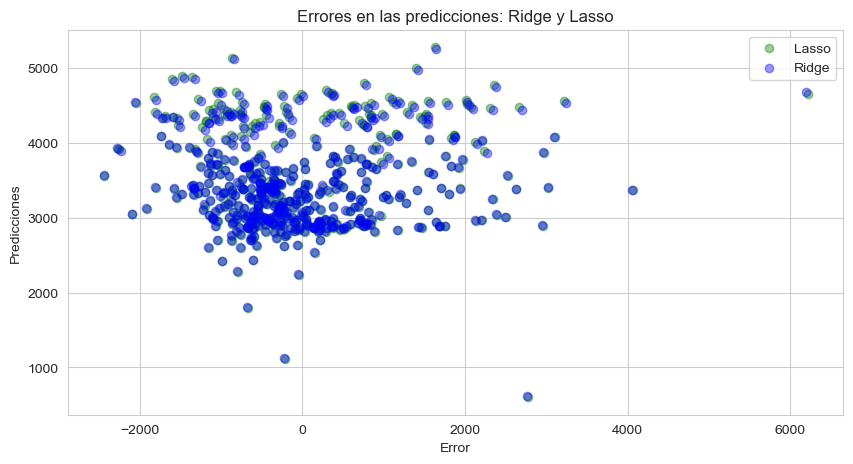

In [58]:
#Comparamos los errores generados por los modelos Ridge y Lasso con el conjunto de test
plt.figure(figsize=(10, 5))

plt.scatter(Y_test - model_fit_lasso.predict(X_test), 
            model_fit_lasso.predict(X_test), color='g', label='Lasso', alpha=0.4)

plt.scatter(Y_test - model_fit_ridge.predict(X_test), 
            model_fit_ridge.predict(X_test), color='b', label='Ridge', alpha=0.4)

plt.xlabel('Error')
plt.ylabel('Predicciones')
plt.title('Errores en las predicciones: Ridge y Lasso')
plt.legend()
plt.show()

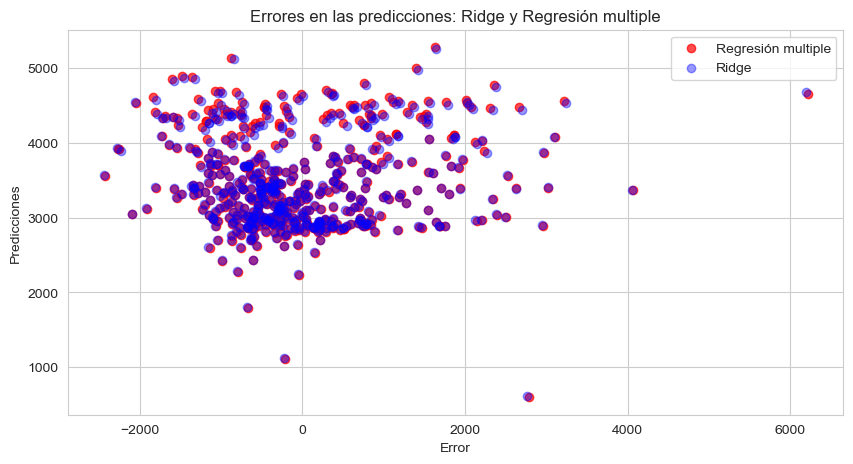

In [59]:
#Comparamos los errores generados por los modelos Ridge y Regresión Multiple con el conjunto de test
plt.figure(figsize=(10, 5))

plt.scatter(Y_test - modelo_fit_lineal.predict(X_test), 
            modelo_fit_lineal.predict(X_test).round(2), color='r', label='Regresión multiple', alpha=0.7)

plt.scatter(Y_test - model_fit_ridge.predict(X_test), 
            model_fit_ridge.predict(X_test), color='b', label='Ridge', alpha=0.4)

plt.xlabel('Error')
plt.ylabel('Predicciones')
plt.title('Errores en las predicciones: Ridge y Regresión multiple')
plt.legend()
plt.show()

### Conclusión

Los tres modelos no presenta una diferencia significativa a la hora de predecir, por lo tanto, la eleccion de uno de ellos no establece una diferencia a la hora de trabajar con el conjunto de datos establecido.

La variable target presentaba una gran dispersión con la demás variables, dado la gran variabilidad precios presenten en el mercado inmobiliario.

La métrica R2 presento un valor de 0.3 con el conjunto de test para los tres modelos usados, el cual es aceptado para generar predicciones con los modelos (es decir, es preferible utilizar el modelo a utilizar la media de los datos)